# imports

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [158]:
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
data = pd.read_csv(
    '/content/drive/MyDrive/datasets/TitanicDisaster-Survival/train.csv', index_col='PassengerId'
)

In [14]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Data Pre-processing and EDA

## drop unnecesary columns and duplicate rows

In [43]:
df = data.copy()

In [44]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [36]:
df.drop_duplicates(inplace=True)

In [46]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

## Type Converstion

In [59]:
df.select_dtypes('object')

,Sex,Embarked
PassengerId,,
1,male,S
2,female,C
3,female,S
4,female,S
5,male,S
...,...,...
887,male,S
888,female,S
889,female,S


In [66]:
df['Sex'].astype('category').cat.codes

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Length: 891, dtype: int8

In [67]:
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('category').cat.codes

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 50.5 KB


## Treating Missing Values

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 82.8 KB


In [122]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [123]:
# imputing missing values
imputer = KNNImputer(n_neighbors=7)
imputer.fit(X=df)

KNNImputer(n_neighbors=7)

In [124]:
imputed_data = imputer.transform(df)
imputed_data.shape

(891, 8)

In [125]:
idf = pd.DataFrame(imputed_data)
idf.head()

,0,1,2,3,4,5,6,7
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [126]:
idf.columns = df.columns
idf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


## Balancing dataset

In [140]:
counts = idf.Survived.value_counts()
counts

0.0    549
1.0    342
Name: Survived, dtype: int64

In [148]:
counts.values

array([549, 342])

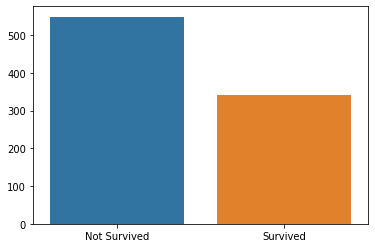

In [150]:
# dataset is imbalance
sns.barplot(x=['Not Survived', 'Survived'], y=counts.values)

In [152]:
counts

0.0    549
1.0    342
Name: Survived, dtype: int64

In [153]:
(1 - 342/549)*100

37.704918032786885

In [161]:
idf.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [163]:
over_sampler = RandomOverSampler(random_state=42)
features, survived = over_sampler.fit_resample(idf.drop(columns=['Survived']), idf.Survived)

In [164]:
survived.shape

(1098,)

In [165]:
survived.value_counts()

0.0    549
1.0    549
Name: Survived, dtype: int64

## Analysis

In [169]:
survived

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1093    1.0
1094    1.0
1095    1.0
1096    1.0
1097    1.0
Name: Survived, Length: 1098, dtype: float64

In [170]:
features['Survived'] = survived

In [172]:
bdf = features
bdf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,0.0


In [174]:
bdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,1098.0,2.249545,0.852699,1.00,1.000,3.0,3.0000,3.0000
Sex,1098.0,0.587432,0.492521,0.00,0.000,1.0,1.0000,1.0000
Age,1098.0,29.731496,13.409531,0.42,21.000,29.0,38.0000,80.0000
SibSp,1098.0,0.518215,1.035441,0.00,0.000,0.0,1.0000,8.0000
Parch,1098.0,0.390710,0.796177,0.00,0.000,0.0,1.0000,6.0000
Fare,1098.0,34.733071,51.288602,0.00,7.925,15.5,34.5844,512.3292
Embarked,1098.0,1.505464,0.812655,-1.00,1.000,2.0,2.0000,2.0000
Survived,1098.0,0.500000,0.500228,0.00,0.000,0.5,1.0000,1.0000


In [178]:
bdf.groupby(by='Survived', ).mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0.0,2.531876,0.852459,31.067244,0.553734,0.32969,22.117887,1.641166
1.0,1.967213,0.322404,28.395748,0.482696,0.45173,47.348254,1.369763
